In [10]:
import pandas as pd

In [28]:
# seperate on a colon
npp_df = pd.read_csv('data/nuclear_power_plants.csv', sep=';')

In [29]:
npp_df.head()

,Id,Name,Latitude,Longitude,Country,Status,ReactorType,ReactorModel,ConstructionStartAt,OperationalFrom,OperationalTo,Capacity,LastUpdatedAt,Source
0,1,Ågesta,59.206,18.0829,Sweden,Shutdown,PHWR,NaN,1957-12-01,1964-05-01,1974-06-02,9.0,2015-05-24T04:51:37+03:00,WNA/IAEA
1,2,Akademik Lomonosov-1 (Vilyuchinsk),59.919,30.2610,Russian Federation,Under Construction,PWR,KLT-40S 'Floating',2007-04-15,NaN,NaN,32.0,2015-05-24T04:54:13+03:00,WNA/IAEA
2,3,Akademik Lomonosov-2 (Vilyuchinsk),59.919,30.2610,Russian Federation,Under Construction,PWR,KLT-40S 'Floating',2007-04-15,NaN,NaN,32.0,2015-05-24T04:54:13+03:00,WNA/IAEA
3,4,Akhvaz-1,NaN,NaN,Iran,Planned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WNA
4,5,Akhvaz-2,NaN,NaN,Iran,Planned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WNA


In [36]:
npp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   788 non-null    int64  
 1   Name                 788 non-null    object 
 2   Latitude             747 non-null    float64
 3   Longitude            747 non-null    float64
 4   Country              788 non-null    object 
 5   Status               788 non-null    object 
 6   ReactorType          778 non-null    object 
 7   ReactorModel         674 non-null    object 
 8   ConstructionStartAt  694 non-null    object 
 9   OperationalFrom      620 non-null    object 
 10  OperationalTo        173 non-null    object 
 11  Capacity             698 non-null    float64
 12  LastUpdatedAt        683 non-null    object 
 13  Source               788 non-null    object 
dtypes: float64(3), int64(1), object(10)
memory usage: 86.3+ KB


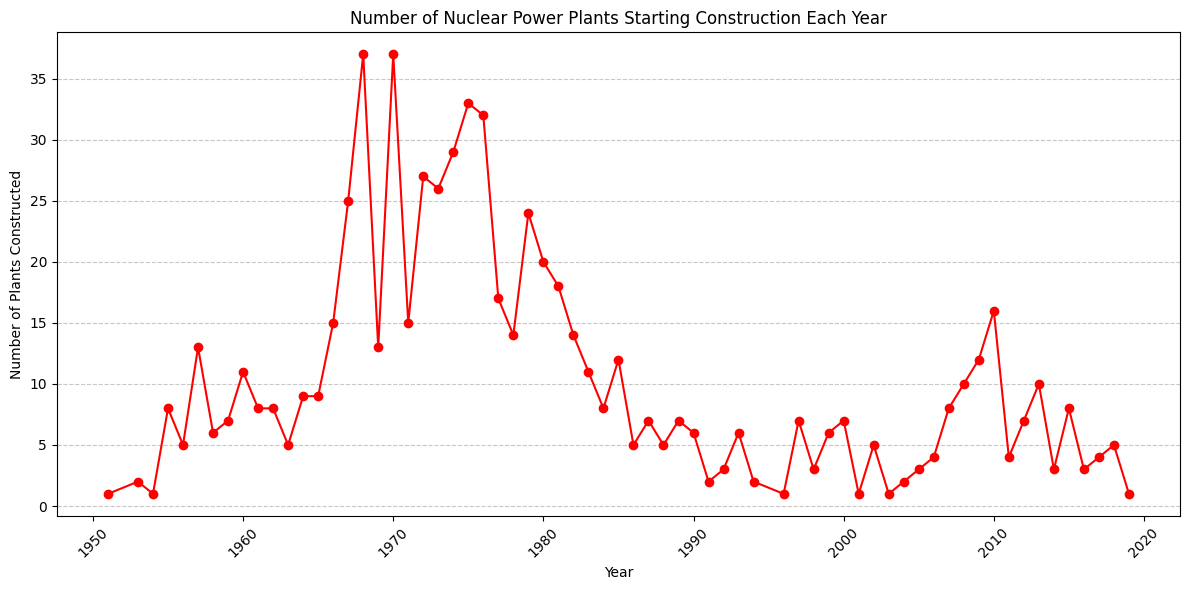

In [47]:
import matplotlib.pyplot as plt

npp_df['ConstructionStartAt'] = pd.to_datetime(npp_df['ConstructionStartAt'], errors='coerce')

npp_df['ConstructionYear'] = npp_df['ConstructionStartAt'].dt.year
npp_df = npp_df.dropna(subset=['ConstructionYear'])

npp_df['ConstructionYear'] = npp_df['ConstructionYear'].astype(int)
construction_counts = npp_df.groupby('ConstructionYear').size()

plt.figure(figsize=(12, 6))
construction_counts.plot(kind='line', color='red', marker= 'o')
plt.title('Number of Nuclear Power Plants Starting Construction Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Plants Constructed')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [55]:
npp_df['Capacity'].unique()

array([   9.,   32., 1114.,  135.,  900.,  626., 1245., 1340.,    5.,
        850.,  912.,  376.,  375.,  888.,  319.,  692.,  950., 1109.,
       1345.,  570.,  835.,  836., 1110., 1310.,  102.,  146.,  560.,
        820.,  138.,  350., 1146., 1178.,   72.,   11.,  910.,  408.,
        110.,   17.,  495.,  150., 1120., 1307., 1065.,  732.,  750.,
        822.,  795.,  770.,  821.,  540.,  920.,  915.,   35., 1171.,
        845.,  840.,   25., 1145., 1300.,   20.,  650.,  601.,  300.,
        315.,  313.,  925.,  604.,   68.,  170.,  480.,  870.,  905.,
        280., 1455., 1450.,  939., 1100., 1150.,  778.,  880.,  825.,
        890.,  881.,  906.,  930., 1084., 1106.,  392., 1000., 1030.,
        203.,   14.,  234.,  192.,  794.,  538.,  420.,  275.,  607.,
         70.,   22.,  600., 1242.,  247.,   60., 1093.,  829., 1330.,
       1630., 1050.,  478.,  330.,  148.,  439.,  760., 1067.,   36.,
         24.,  529., 1127.,  250.,  645.,   54., 1225., 1250.,  440.,
       1289.,   23.,

In [54]:
npp_df['ReactorType'].unique()

array(['PHWR', 'PWR', 'FBR', 'LWGR', 'BWR', 'GCR', 'HWGCR', 'HTGR',
       'HWLWR', 'OCR', 'SGHWR'], dtype=object)

Trying to create a map of nuclear reactors, where each reactor is represented by a circle in the location it is in. The radius of each circle is a representation of how much output it has. I need a metric to determine that so plan is to sum capacity of each reactor type and average it.

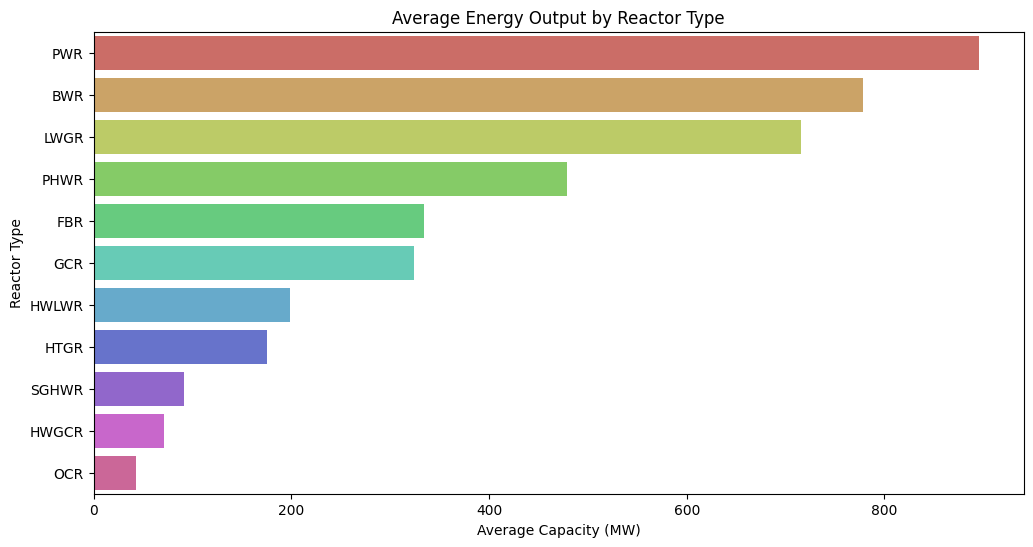

In [62]:
import seaborn as sns

capacity_by_type = npp_df.groupby('ReactorType')['Capacity'].mean().reset_index()
sorted_capacity = capacity_by_type.sort_values('Capacity', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Capacity', y='ReactorType', data=sorted_capacity, palette='hls', hue = 'ReactorType')
plt.title('Average Energy Output by Reactor Type')
plt.xlabel('Average Capacity (MW)')
plt.ylabel('Reactor Type')
plt.show()

In [112]:
# map reactor type to capacity in sorted_capacity
active_npp = npp_df[npp_df['Status']=='Operational']
capacity_dict = sorted_capacity.set_index('ReactorType')['Capacity'].to_dict()
capacity_dict
active_npp['average_capacity'] = active_npp['ReactorType'].map(capacity_dict)
# need to size down average so I can just map it to size of circle
max_average_capacity = active_npp['average_capacity'].mean()
active_npp['normalized_capacity'] = (active_npp['average_capacity'] / max_average_capacity) * 5

/var/folders/4v/hcqt1p7s1859vr42874pyy8r0000gn/T/ipykernel_99658/1158570754.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_npp['average_capacity'] = active_npp['ReactorType'].map(capacity_dict)
/var/folders/4v/hcqt1p7s1859vr42874pyy8r0000gn/T/ipykernel_99658/1158570754.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_npp['normalized_capacity'] = (active_npp['average_capacity'] / max_average_capacity) * 5


,Id,Name,Latitude,Longitude,Country,Status,ReactorType,ReactorModel,ConstructionStartAt,OperationalFrom,OperationalTo,Capacity,LastUpdatedAt,Source,ConstructionYear,OperationalFromYear,OperationalToYear,average_capacity,normalized_capacity
10,11,Almaraz-1,39.807,-5.698,Spain,Operational,PWR,WH 3LP,1973-07-03,1983-09-01,NaT,900.0,2017-02-10T23:56:15+02:00,WNA/IAEA,1973,1983.0,NaN,895.832524,5.54741
11,12,Almaraz-2,39.807,-5.698,Spain,Operational,PWR,WH 3LP,1973-07-03,1984-07-01,NaT,900.0,2019-06-02T20:17:55+03:00,WNA/IAEA,1973,1984.0,NaN,895.832524,5.54741
12,13,Angra-1,-23.008,-44.457,Brazil,Operational,PWR,WH 2LP,1971-05-01,1985-01-01,NaT,626.0,2017-02-10T23:55:45+02:00,WNA/IAEA,1971,1985.0,NaN,895.832524,5.54741
13,14,Angra-2,-23.008,-44.457,Brazil,Operational,PWR,PRE KONVOI,1976-01-01,2001-02-01,NaT,1245.0,2015-05-24T04:50:19+03:00,WNA/IAEA,1976,2001.0,NaN,895.832524,5.54741
16,17,Arkansas Nuclear One-1 (ANO-1),35.310,-93.230,United States,Operational,PWR,B&W LLP (DRYAMB),1968-10-01,1974-12-19,NaT,850.0,2017-02-10T23:58:30+02:00,WNA/IAEA,1968,1974.0,NaN,895.832524,5.54741


In [121]:
import folium
from IPython.display import display
import branca.colormap as cm

# I only want to map active plants.
# filter out only active plants
unique_types = active_npp['ReactorType'].dropna().unique()
colors = cm.linear.Set1_09.scale(0, len(unique_types))
type_color = {typ: colors(i) for i, typ in enumerate(unique_types)}

map = folium.Map(location=[0, 0], zoom_start=2)

# Add points to the map
for idx, row in active_npp.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius= row['normalized_capacity'],
        popup=f"{row['Name']} - {row['ReactorType']}",
        color= (type_color.get(row['ReactorType'], 'gray')),
        fill=True,
        fill_opacity=0.3,
        tooltip=row['Name']
    ).add_to(map)
display(map)

In [104]:
active_npp['Capacity'].value_counts()

Capacity
950.0     45
202.0     14
1000.0    12
900.0     11
1067.0    11
          ..
306.0      1
545.0      1
1159.0     1
778.0      1
965.0      1
Name: count, Length: 181, dtype: int64